# PGC - Treinamento e Avaliação

In [1]:
import time
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

t_total = time.perf_counter()

In [2]:
params = {'figure.figsize': [10,10],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.autolayout': True
    }

plt.rcParams.update(params)

Importando e exibindo base de dados.

In [3]:
x_raw_full = pd.read_excel("../Dados/dataset-processed.xlsx")
y = x_raw_full.pop('Visualizações')
x_raw_full.head()

,Título Representativo,Mídia,SEO,Links I.,Links E.,Complexidade,Introdução,Analogias,Interação,Siglas,numPal,numPar,numSub,numAdj,numVrb,numNEs,numDet,numConj,numAdv,numAdp,numNum,pergunta,tamMedioParagraf,tamTitulo,refs,Dias,categoria-ABC da ciência,categoria-Ciência Pop,categoria-Ciência ao redor,categoria-O que que a ciência tem?,categoria-Outros,categoria-Profissão Cientista,categoria-Sci… what?,categoria-Você disse ciência?,área-Astronomia,área-Atualidades,área-Biologia,área-Ciência,área-Física,área-História,área-Matemática,área-Medicina,área-Psicologia,área-Química,área-Tecnologia
0,1,1,0,0,2,1,1,0,1,1,345,9,0.3362,0.0754,0.1159,0.1420,0.1594,0.0406,0.0464,0.0899,0.0116,1,308,40,15,879,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,2,1,0,3,1,1,0,1,0,532,18,0.3684,0.0752,0.1034,0.1673,0.1729,0.0489,0.0169,0.1222,0.0132,0,204,22,17,871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,7,1,0,28,2,1,1,1,0,913,33,0.3395,0.0537,0.1544,0.1249,0.1796,0.0372,0.0482,0.0832,0.0175,1,180,65,8,870,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,3,2,1,1,1,0,322,6,0.3758,0.0528,0.1273,0.0590,0.1584,0.0435,0.0373,0.1335,0.0124,0,514,20,5,867,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,1,0,0,3,0,0,0,1,557,13,0.4022,0.0772,0.0790,0.1598,0.1544,0.0395,0.0305,0.1472,0.0180,0,340,56,5,839,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


Criando dataframes padronizados e regularizados e exibindo os valores de cada um para o primeiro texto.

In [4]:
x_standard_full = pd.DataFrame(StandardScaler().fit_transform(x_raw_full), columns=x_raw_full.columns)
x_minmax_full = pd.DataFrame(MinMaxScaler().fit_transform(x_raw_full), columns=x_raw_full.columns)

In [5]:
view = pd.DataFrame()
view['DF Completo'] = x_raw_full.loc[0]
view['MinMax Scaller'] = x_minmax_full.loc[0]
view['Standard Scaller'] = x_standard_full.loc[0]
view.to_excel('../Dados/dataset-texto-0.xlsx', index = True)
view

,DF Completo,MinMax Scaller,Standard Scaller
Título Representativo,1.0000,1.000000,0.313823
Mídia,1.0000,0.000000,-0.457322
SEO,0.0000,0.000000,-2.656230
Links I.,0.0000,0.000000,-0.412911
Links E.,2.0000,0.036364,-0.664944
Complexidade,1.0000,0.000000,-1.319119
Introdução,1.0000,1.000000,0.339683
Analogias,0.0000,0.000000,-0.434194
Interação,1.0000,1.000000,0.542810
Siglas,1.0000,1.000000,0.478345


In [6]:
columns_to_drop = ['categoria-ABC da ciência', 'categoria-Você disse ciência?',
                   'área-Astronomia', 'área-Atualidades', 'área-Matemática',
                   'área-Psicologia', 'área-Tecnologia']

x_raw = x_raw_full.drop(columns=columns_to_drop)
x_minmax = x_minmax_full.drop(columns=columns_to_drop)
x_standard = x_standard_full.drop(columns=columns_to_drop)

In [7]:
dados = [('Dataframe Completo',x_raw),('MimMaxScaller',x_minmax),('StandardScaller',x_standard)]

Recebe qual regressor e quais parâmetros testar, então usa para cada dataframe, retornando listas com os valores de R2 e ME.

In [8]:
def test_all(reg, param):
    t=time.perf_counter()

    R2 = []
    ME = []

    for dado in dados:
        print(dado[0])
        x_PCA = []
        for i in range (2, dado[1].shape[1]):
            x_PCA.append(PCA(n_components=i).fit_transform(dado[1]))
        list_R2 = []
        list_mean_error = []

        for j in range (len(x_PCA)):
            x_train, x_test, y_train, y_test = train_test_split(x_PCA[j], y, test_size=0.25, random_state=42)
            print(j+2)

            gs = GridSearchCV(reg, param)
            gs.fit(x_train, y_train)
            regressor = gs.best_estimator_
            print(gs.best_estimator_)

            regressor.fit(x_train, y_train)
            y_pred = regressor.predict(x_test)
            mean_error = round(np.mean(np.abs((y_pred-y_test)/y_test)),3)
            r2 = round(r2_score(y_test, y_pred),5)
            
            print(f"R2: {r2}")
            print(f"ME: {mean_error}")
            
            list_mean_error.append(mean_error)
            list_R2.append(r2)
        
        print(j+3)
        x_train, x_test, y_train, y_test = train_test_split(dado[1], y, test_size=0.25, random_state=42)

        gs = GridSearchCV(reg, param)
        gs.fit(x_train, y_train)
        regressor = gs.best_estimator_
        print(gs.best_estimator_)

        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        mean_error = round(np.mean(np.abs((y_pred-y_test)/y_test)),5)
        r2 = round(r2_score(y_test, y_pred),5)

        print(f"R2: {r2}")
        print(f"ME: {mean_error}")

        list_mean_error.append(mean_error)
        list_R2.append(r2)

        
        ME.append(list_mean_error)
        R2.append(list_R2)

    print(round(time.perf_counter()-t,3), "segundos")

    return R2, ME

In [9]:
regressor = RandomForestRegressor()
parameters = {'n_estimators':[10, 50, 100, 200, 300],
              'min_samples_leaf':[5, 10, 15, 20]}

R2_RF, ME_RF = test_all(regressor, parameters)

print(R2_RF)
print(ME_RF)

Dataframe Completo
2
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.2134
ME: 1.108
3
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.16008
ME: 1.292
4
Rand

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.28028
ME: 1.192
20
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.28778
ME: 1.28
21
RandomForestRegressor(b

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.23034
ME: 1.336
37
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.25406
ME: 1.257
38
RandomForestRegressor(

R2: 0.11618
ME: 1.786
16
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.14997
ME: 1.708
17
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.11034
ME: 1.813

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.14395
ME: 1.773
34
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.17442
ME: 1.658
35
RandomForestRegressor(

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.15683
ME: 1.741
14
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.22082
ME: 1.613
15
RandomForestRegressor(

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.22313
ME: 1.519
31
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2: 0.21954
ME: 1.594
32
RandomForestRegressor(b

In [10]:
regressor = SVR(kernel='linear')
parameters = {'epsilon':[0.05, 0.1, 0.15, 0.2, 0.25]}

R2_SVR, ME_SVR = test_all(regressor, parameters)

print(R2_SVR)
print(ME_SVR)

Dataframe Completo
2
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.27232
ME: 0.684
3
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.29292
ME: 0.758
4
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.29168
ME: 0.755
5
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.29347
ME: 0.758
6
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.31385
ME: 0.855
7
SVR(C=1.0, cache_size=20

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: -0.00206
ME: 1.612
10
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: -0.00556
ME: 1.598
11
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: -0.00584
ME: 1.592
12
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: -0.00623
ME: 1.594
13
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: -0.0064
ME: 1.591
14
SVR(C=1.0, cache_size=200, coef0=0.0

R2: 0.10416
ME: 1.346
17
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.10941
ME: 1.354
18
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.10152
ME: 1.355
19
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.1019
ME: 1.356
20
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.10993
ME: 1.334
21
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2: 0.11596
ME: 1.336
22
SVR(C=1.0, cache

In [11]:
regressor = LinearRegression()
parameters = {'normalize':[False, True]}

R2_LR, ME_LR = test_all(regressor, parameters)

print(R2_LR)
print(ME_LR)

Dataframe Completo
2
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.30297
ME: 1.082
3
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.30489
ME: 1.095
4
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.29835
ME: 1.079
5
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.29026
ME: 1.069
6
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.30516
ME: 1.167
7
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.24271
ME: 1.264
8
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.23647
ME: 1.261
9
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.23544
ME: 1.262
10
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.22987
ME: 1.218
11
LinearRegression(copy_X=True, fit_interce

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
R2: 0.22091
ME: 1.608
8
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.2645
ME: 1.513
9
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.34257
ME: 1.192
10
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
R2: 0.30661
ME: 1.314
11
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
R2: 0.3018
ME: 1.322
12
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.3117
ME: 1.316
13
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.31552
ME: 1.296
14
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.31702
ME: 1.309
15
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
R2: 0.30555
ME: 1.271
16
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, n

In [12]:
regressor = MLPRegressor()
parameters = {'hidden_layer_sizes':[100, 150, 200, 250, 300]}

R2_MLP, ME_MLP = test_all(regressor, parameters)

print(R2_MLP)
print(ME_MLP)

Dataframe Completo
2
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=150, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
R2: 0.28118
ME: 0.899
3
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=150, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False,

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
R2: 0.21441
ME: 1.126
19
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
R

R2: 0.22563
ME: 1.109
35
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
R2: 0.21938
ME: 1.146
36
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=F

R2: -1.14421
ME: 0.922
14
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
R2: -1.14314
ME: 0.925
15
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose

R2: -1.14954
ME: 0.934
30
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
R2: -1.15252
ME: 0.934
31
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose

R2: -1.01922
ME: 0.819
9
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
R2: -0.99705
ME: 0.838
10
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=

R2: -1.01728
ME: 0.839
25
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
R2: -1.00071
ME: 0.822
26
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=300, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose

In [13]:
regressor = KNeighborsRegressor()
parameters = {'n_neighbors':[1, 3, 5, 15, 25, 35, 45, 55],
             'weights':['uniform','distance']}

R2_KNN, ME_KNN = test_all(regressor, parameters)

print(R2_KNN)
print(ME_KNN)

Dataframe Completo
2
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')
R2: 0.21429
ME: 1.298
3
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')
R2: 0.18792
ME: 1.271
4
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')
R2: 0.18796
ME: 1.271
5
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')
R2: 0.18796
ME: 1.271
6
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
R2: 0.05123
ME: 1.816
5
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
R2: 0.11674
ME: 1.689
6
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='distance')
R2: 0.14344
ME: 1.645
7
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='distance')
R2: 0.16084
ME: 1.577
8
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
              

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
R2: 0.11847
ME: 1.471
7
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
R2: 0.10486
ME: 1.529
8
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
R2: 0.12248
ME: 1.552
9
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
R2: 0.15824
ME: 1.474
10
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
             

In [14]:
pcas = []
for i in range (len(R2_RF[0])):
    pcas.append(i+2)

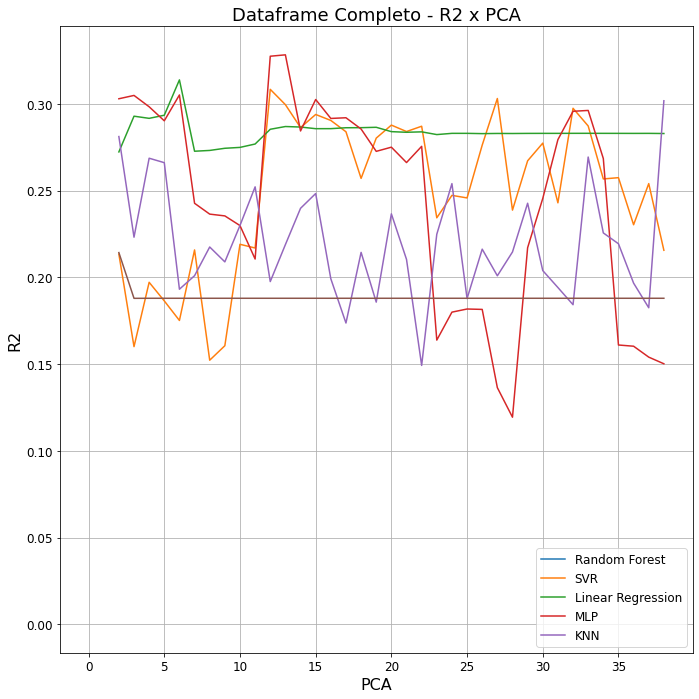

In [15]:
# Dataframe Completo
# R2

plt.grid()
plt.plot(0,0)
sns.lineplot(x=pcas, y=R2_RF[0])
sns.lineplot(x=pcas, y=R2_SVR[0])
sns.lineplot(x=pcas, y=R2_LR[0])
sns.lineplot(x=pcas, y=R2_MLP[0])
sns.lineplot(x=pcas, y=R2_KNN[0])
plt.title('Dataframe Completo - R2 x PCA')
plt.xlabel('PCA')
plt.ylabel('R2')
plt.legend(['Random Forest','SVR','Linear Regression','MLP','KNN'])
#plt.legend(['Random Forest','SVR','MLP','KNN'])
plt.savefig("../Imagens/df-r2.png")
plt.show()

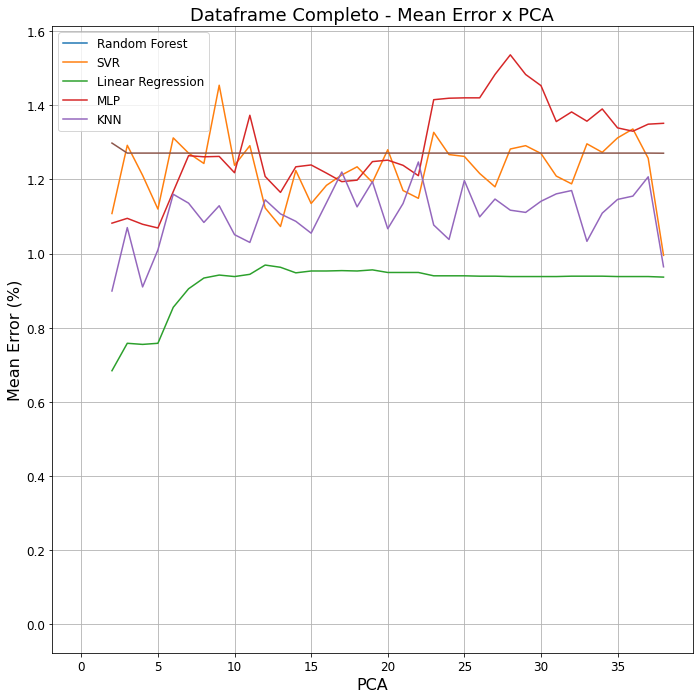

In [16]:
# Dataframe Completo
# ME

plt.grid()
plt.plot(0,0)
sns.lineplot(x=pcas, y=ME_RF[0])
sns.lineplot(x=pcas, y=ME_SVR[0])
sns.lineplot(x=pcas, y=ME_LR[0])
sns.lineplot(x=pcas, y=ME_MLP[0])
sns.lineplot(x=pcas, y=ME_KNN[0])
plt.title('Dataframe Completo - Mean Error x PCA')
plt.xlabel('PCA')
plt.ylabel('Mean Error (%)')
plt.legend(['Random Forest','SVR','Linear Regression','MLP','KNN'])
#plt.legend(['Random Forest','SVR','MLP','KNN'])
plt.savefig("../Imagens/df-me.png")
plt.show()

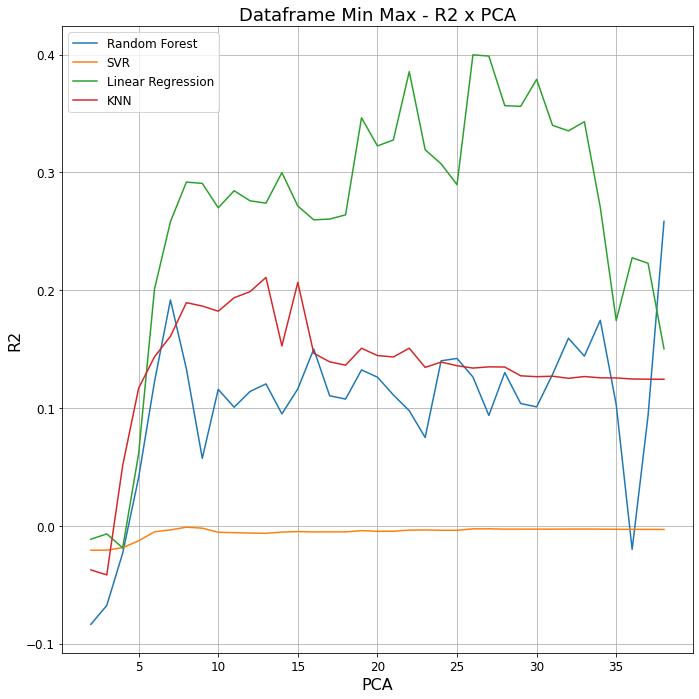

In [17]:
# MinMax
# R2

plt.grid()
sns.lineplot(x=pcas, y=R2_RF[1])
sns.lineplot(x=pcas, y=R2_SVR[1])
sns.lineplot(x=pcas, y=R2_LR[1])
#sns.lineplot(x=pcas, y=R2_MLP[1])
sns.lineplot(x=pcas, y=R2_KNN[1])
plt.title('Dataframe Min Max - R2 x PCA')
plt.xlabel('PCA')
plt.ylabel('R2')
#plt.legend(['Random Forest','SVR','Linear Regression','MLP','KNN'])
plt.legend(['Random Forest','SVR','Linear Regression','KNN'])
plt.savefig("../Imagens/dfmm-r2.png")
plt.show()

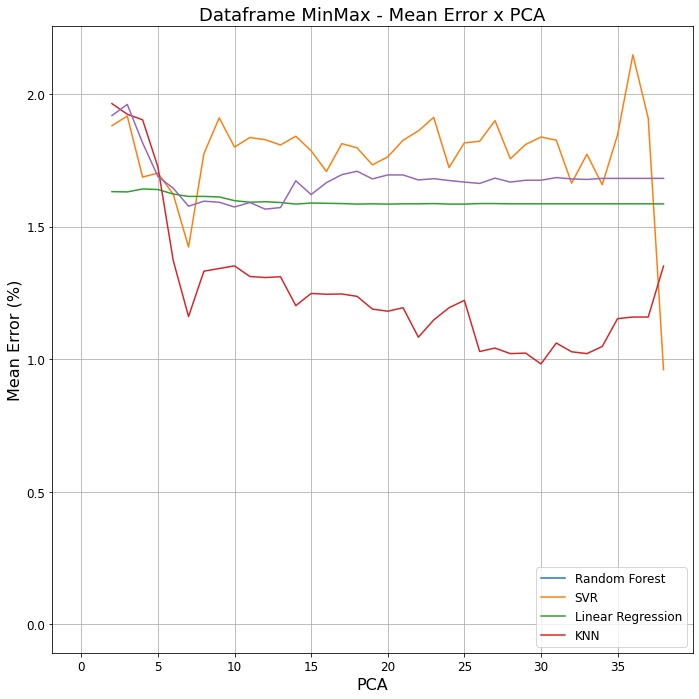

In [18]:
# MinMax
# ME

plt.grid()
plt.plot(0,0)
sns.lineplot(x=pcas, y=ME_RF[1])
sns.lineplot(x=pcas, y=ME_SVR[1])
sns.lineplot(x=pcas, y=ME_LR[1])
#sns.lineplot(x=pcas, y=ME_MLP[1])
sns.lineplot(x=pcas, y=ME_KNN[1])
plt.title('Dataframe MinMax - Mean Error x PCA')
plt.xlabel('PCA')
plt.ylabel('Mean Error (%)')
#plt.legend(['Random Forest','SVR','Linear Regression','MLP','KNN'])
plt.legend(['Random Forest','SVR','Linear Regression','KNN'])
plt.savefig("../Imagens/dfmm-me.png")
plt.show()

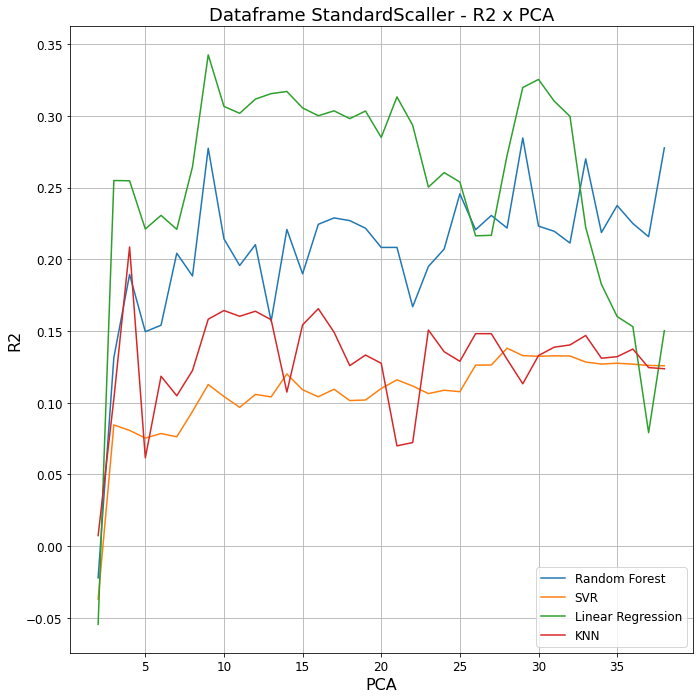

In [19]:
# StandardScaller
# R2

plt.grid()
sns.lineplot(x=pcas, y=R2_RF[2])
sns.lineplot(x=pcas, y=R2_SVR[2])
sns.lineplot(x=pcas, y=R2_LR[2])
#sns.lineplot(x=pcas, y=R2_MLP[2])
sns.lineplot(x=pcas, y=R2_KNN[2])
plt.title('Método x PCA x R2')
plt.title('Dataframe StandardScaller - R2 x PCA')
plt.xlabel('PCA')
plt.ylabel('R2')
#plt.legend(['Random Forest','SVR','Linear Regression','MLP','KNN'])
plt.legend(['Random Forest','SVR','Linear Regression','KNN'])
plt.savefig("../Imagens/dfsc-r2.png")
plt.show()

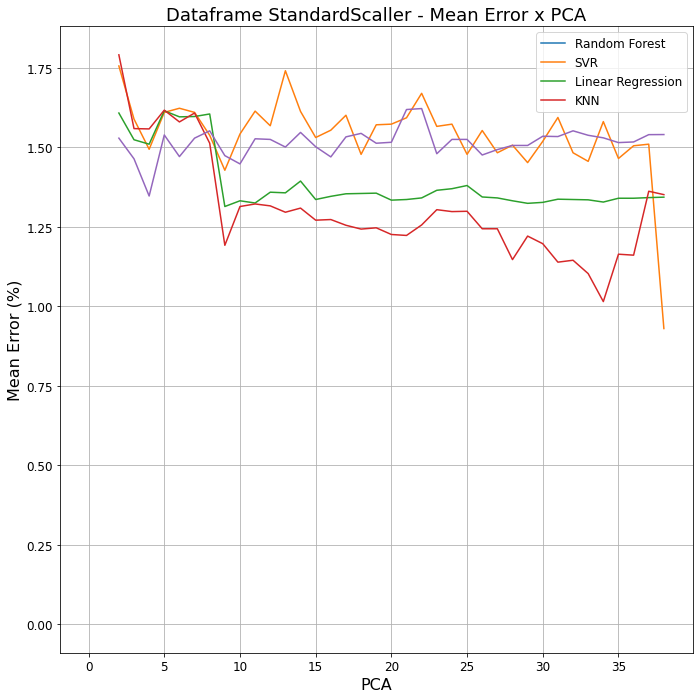

In [20]:
# StandardScaller
# ME

plt.grid()
plt.plot(0,0)
sns.lineplot(x=pcas, y=ME_RF[2])
sns.lineplot(x=pcas, y=ME_SVR[2])
sns.lineplot(x=pcas, y=ME_LR[2])
#sns.lineplot(x=pcas, y=ME_MLP[2])
sns.lineplot(x=pcas, y=ME_KNN[2])
plt.title('Dataframe StandardScaller - Mean Error x PCA')
plt.xlabel('PCA')
plt.ylabel('Mean Error (%)')
#plt.legend(['Random Forest','SVR','Linear Regression','MLP','KNN'])
plt.legend(['Random Forest','SVR','Linear Regression','KNN'])
plt.savefig("../Imagens/dfsc-me.png")
plt.show()

In [21]:
total = round(time.perf_counter()-t_total,3)
print(total, "segundos")
print(total/60, "minutos")

1241.251 segundos
20.687516666666667 minutos
